# Recommending a life insurance policy

## Introduction

When buying an insurance policy, often times we listen and buy what a financial consultant from one company suggests. Based on the XGBoost regressor model which takes into account the lifestyle and other personal details, this model can make a recommendation based on a data driven approach. It is more accurate and takes no biases.

This analysis aims to identify the most effective machine learning model—and the most informative features—for predicting what policy one should buy. The data looks at policies across 13 different insuring companies tagetted at people between the ages of 25 to 36 years old. Our workflow covers environment setup, feature selection, preprocessing, and the training of multiple models. This is the work of the final model selected, which is the XGBoost Classifier model. The goal is to build a robust, accurate recommender of a policy based on a person's data.

# Step 0: Installing XGBoost 

Over here we are installing the XGBoost

In [1]:
# pip install xgboost

# Step 1: Import the packages

In this section, we will install and import the required libraries needed for data manipulation, visualization, and modeling.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Step 2: Load the dataset

In this section, we will walk through the essential steps required to prepare our dataset for modeling. The following sections will pre-process the data, and create the train-test split for machine learning.

In [ ]:
# --- 1. Load the data ---
# Replace 'dpi_premium_rates.csv' with the correct filename if it's different.
try:
    df = pd.read_csv('../data/dpi_premium_rates.csv')
    print("Data loaded successfully.")

except FileNotFoundError:
    print("Error: 'dpi_premium_rates.csv' not found. Please make sure the file is in the same directory as the script.")
    exit()

Data loaded successfully.


# Step 3: Preprocess the data

In this section, we will walk through the essential steps required to prepare our dataset for modeling. For XGBoost Classifier, the target is required to be encoded. We used the LabelEncoder(). Following which, all numerical and categorical features were then encoded as well using StandardScalar() and OneHotEncoding() respectively

In [4]:
# --- 2. Separate features (X) and target (y) ---

# The target variable is 'policy_name'
target_column = 'policy_name'
X = df.drop(columns=[target_column, 'provider'])
y = df[target_column]

In [5]:
# --- 3. Encode the target variable (policy_name) into numbers ---
# XGBoost requires the target variable to be numerical.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Storing the original classes for easy reading later
original_classes = label_encoder.classes_

In [6]:
# --- 4. Identify categorical and numerical features for preprocessing ---
# We need to handle different data types differently.
categorical_features = ['type', 'gender','smoker', 'age', 'most_notable_5', 'market_share_top', 'provide_ci', 'local_companies', 
                       'provide_hospital_ins']
numerical_features = ['coverage_term', 'annual_premium', 'sum_assured', 'critical_illness', 'age_until','entered_sg']

In [7]:
# --- 5. Create a preprocessing pipeline ---
# Use ColumnTransformer to apply different transformations to different columns.
# 'OneHotEncoder' for categorical features to convert them into a numerical format.
# 'StandardScaler' for numerical features to scale them, which can improve model performance.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 4: Split the data into training and testing sets

This is where we will split the data into training and testing sets. 

In [8]:
# --- 6. Create the full model pipeline ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

In [9]:
# --- 7. Split the data into training and testing sets ---
# Note that we use the encoded target variable y_encoded here.
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 3360 samples
Testing set size: 1440 samples


# Step 5: Create and train the XGBoost Classifier model

In this section, we will dive into building and evaluating the ML models. The use of ML models enables computers to learn from the dataset and make predictions by identifying patterns in the dataset.

We will build and evaluate the XGBoost model. We will evaluate the performance of the model by using the Accuracy and Run time values. Our baseline model was a RandomForest Classifier which had an Accuracy of 93.47% and an Run time of 98ms.

The XGBoost model(eXtreme Gradient Boosting) is a powerful machine learning algorithm that works like a team of decision-making experts. Instead of one expert making all the decisions, it uses a series of simple "experts" (called decision trees) to make predictions.

- **Speed**: It can handle large datasets very quickly
- **Regularization**: It has built-in features to prevent overfitting

In [10]:
# --- 8. Train the model ---
print("\nTraining the XGBoost model...")
model.fit(X_train, y_train_encoded)
print("Model training complete.")


Training the XGBoost model...


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.


# Step 6: Make predictions on the train and test data

In [11]:
# --- 9. Make predictions on both the training and test sets ---
print("\nMaking predictions on the training and test sets...")
y_train_pred_encoded = model.predict(X_train)
y_test_pred_encoded = model.predict(X_test)


Making predictions on the training and test sets...


# Step 7: Reversing the encoding to get back the original data

This step is needed to reverse the encoding during the evaluation phase

In [12]:
# --- 10. Decode predictions back to original labels for evaluation ---
y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
y_train = label_encoder.inverse_transform(y_train_encoded)
y_test = label_encoder.inverse_transform(y_test_encoded)

# Step 8: Evaluate the model's performance

In [13]:
# --- 11. Evaluate the model on the TRAINING set ---
print("\n--- Training Set Evaluation ---")
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))


--- Training Set Evaluation ---
Training Accuracy: 1.0

Training Classification Report:
                                                                precision    recall  f1-score   support

                                       DIRECT - AIA Term Cover       1.00      1.00      1.00       269
                                 DIRECT - China Life Term Plan       1.00      1.00      1.00       269
                                      DIRECT - Etiqa term life       1.00      1.00      1.00       135
                              DIRECT - Etiqa term life with CI       1.00      1.00      1.00       135
                                           DIRECT - Great Term       1.00      1.00      1.00       134
DIRECT - Great Term with Optional DIRECT - Great Critical Care       1.00      1.00      1.00       134
                                DIRECT - HSBC Life - Term Lite       1.00      1.00      1.00       134
                   DIRECT - HSBC Life - Term Lite and Termcare       1.00     

In [14]:
# --- 12. Evaluate the model on the TEST set ---
print("\n--- Test Set Evaluation ---")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))


--- Test Set Evaluation ---
Test Accuracy: 1.0

Test Classification Report:
                                                                precision    recall  f1-score   support

                                       DIRECT - AIA Term Cover       1.00      1.00      1.00       115
                                 DIRECT - China Life Term Plan       1.00      1.00      1.00       115
                                      DIRECT - Etiqa term life       1.00      1.00      1.00        57
                              DIRECT - Etiqa term life with CI       1.00      1.00      1.00        57
                                           DIRECT - Great Term       1.00      1.00      1.00        58
DIRECT - Great Term with Optional DIRECT - Great Critical Care       1.00      1.00      1.00        58
                                DIRECT - HSBC Life - Term Lite       1.00      1.00      1.00        58
                   DIRECT - HSBC Life - Term Lite and Termcare       1.00      1.00      1

# Step 9: Plotting the Confusion Matrix

Plotting the confusion matrix to gather more insights


--- Confusion Matrix (Test Set) ---


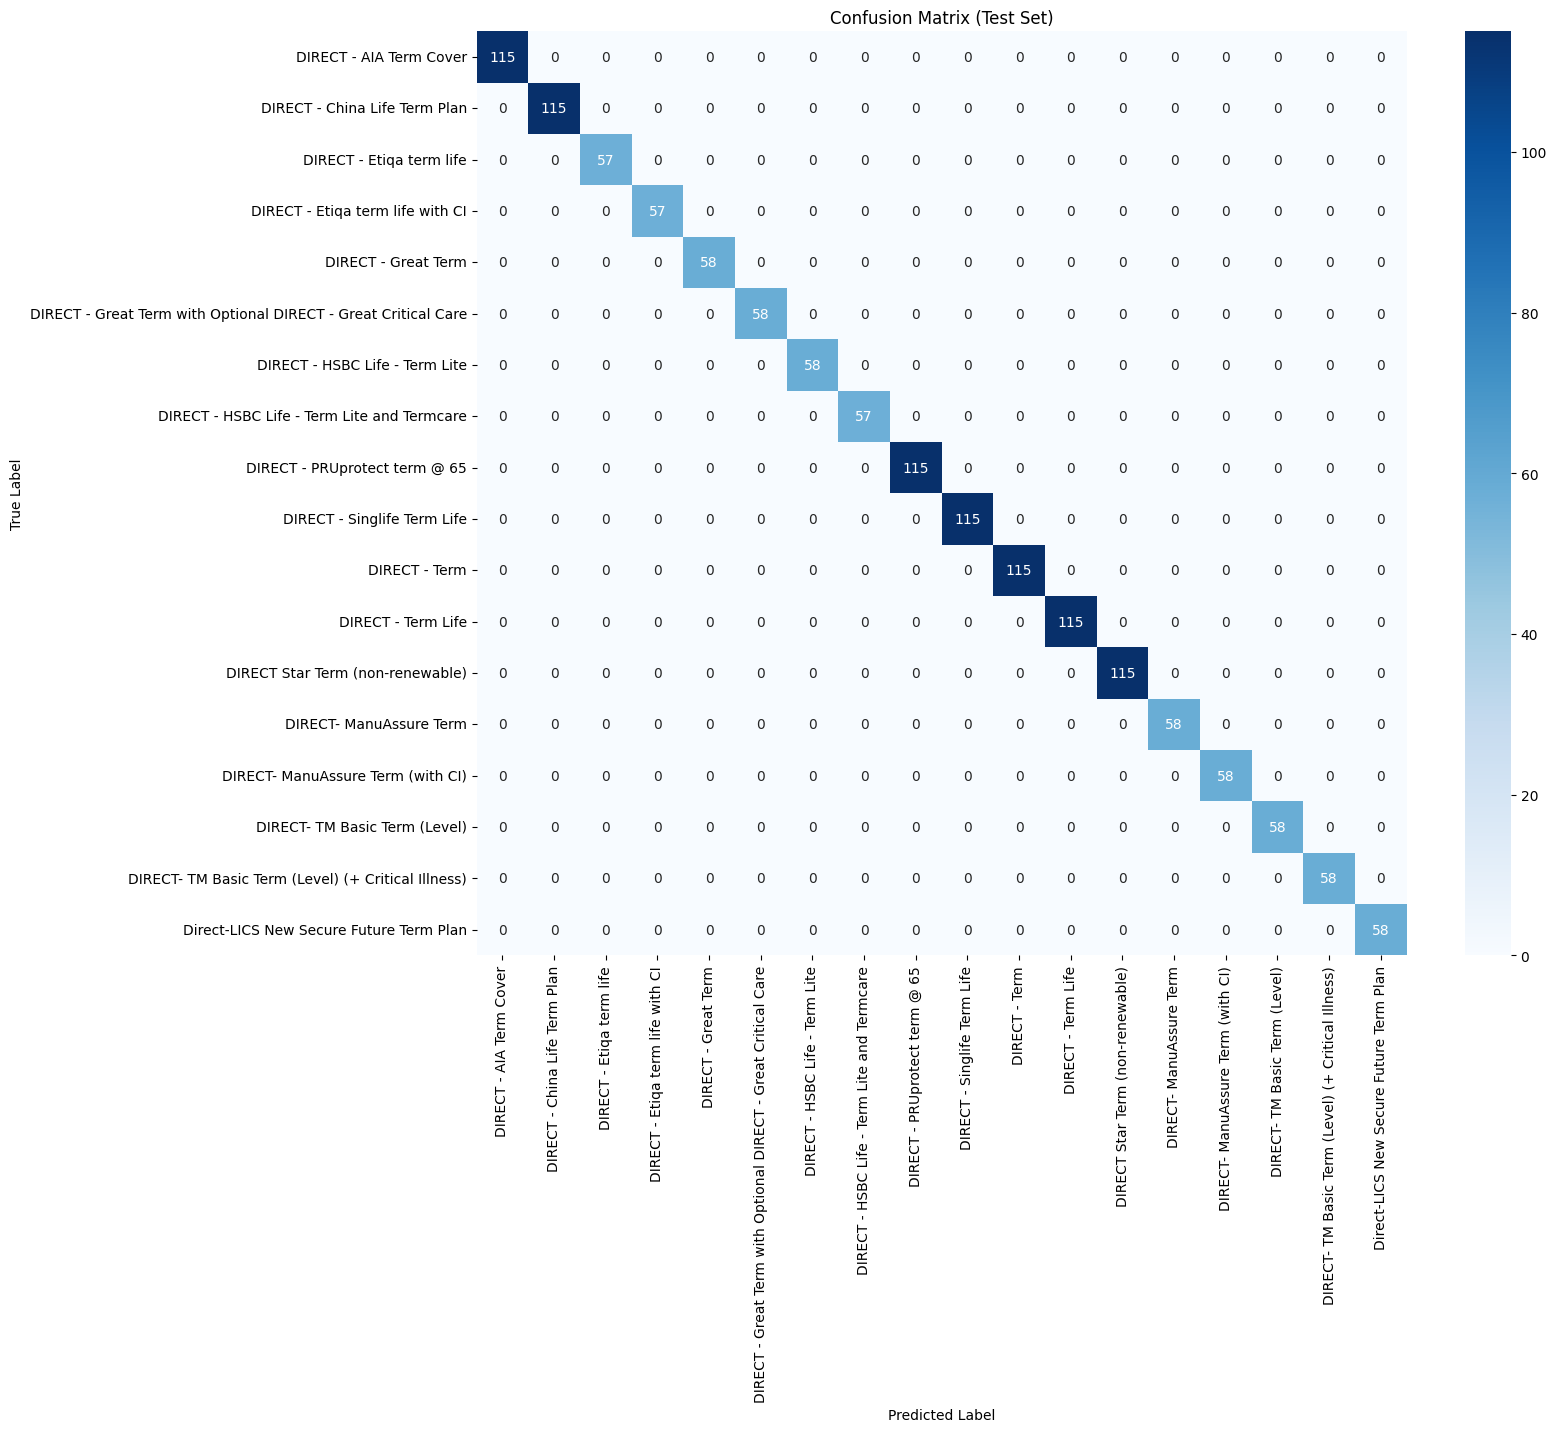

In [15]:
# --- 13. Display Confusion Matrix for the TEST set ---
print("\n--- Confusion Matrix (Test Set) ---")
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=original_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=original_classes, yticklabels=original_classes)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 10: Save the trained model and predictions

Saving the model and predictions for use in a streamlit app

In [16]:
# Save the trained XGBoost classifier to a pickle file
# This file can be loaded later for making new predictions
with open('xgboost_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nXGBoost classifier model saved as 'xgboost_classifier_model.pkl'")


XGBoost classifier model saved as 'xgboost_classifier_model.pkl'


In [17]:
# Create a DataFrame for the test predictions
predictions_df = X_test.copy()
predictions_df['actual_class'] = y_test
predictions_df['predicted_class'] = y_test_pred

In [18]:
# Save the DataFrame to a CSV file
predictions_df.to_csv('xgboost_predictions.csv', index=False)
print("Predictions saved to 'xgboost_predictions.csv'")

Predictions saved to 'xgboost_predictions.csv'


## 4. Conclusion and Recommendations

We benchmarked multiple machine-learning models and evaluated them on train/test Accuracy and runtime, and the gap between train and test performance. **XGBoost** emerged as the preferred model. As shown in the summary table, it delivers high train and test Accuracy with a fast runtime, shows no material overfitting, and exceeds our baselines (≥93.47% Accuracy and Run time < 98ms).


## Key references include:
* [Scikit-learn](https://scikit-learn.org/)
* [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)
* [Stack Overflow](https://stackoverflow.com/)